### Non-Linear Data Transformation and Regularized Regression Models(Lasso,Ridge)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(40)
m = 1000
X = 10 * np.random.rand(m, 1) - 5
y = 2 * X + X**2 + np.random.randn(m,1)

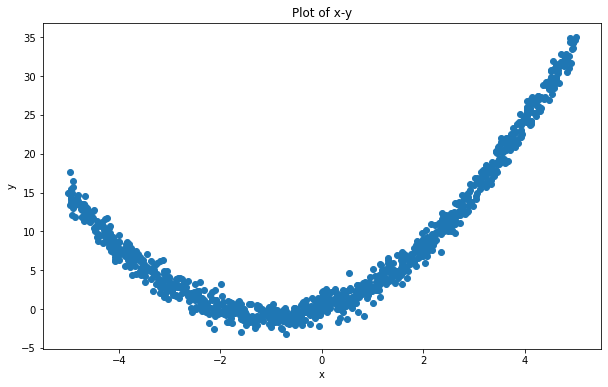

In [31]:
# plot  data
fig = plt.figure(figsize = (10,6))
plt.plot(X,y, "o")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of x-y")
plt.show()

In [8]:
# split the data into training and validation set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# 1) Transform the data using a polynomial of degree four

# polynomial of degree 4
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=4, include_bias=False)

x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)# create polynomial features of degree 4


In [21]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd


model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train_poly, y_train) 
pred_train_lasso= model_lasso.predict(x_train_poly)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(x_test_poly)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

1.0113052788371817
0.9878754544658613
0.96272702720395
0.9902331437077726


In [26]:
# 3) What are the coefficients each lasso regularized model predicts? Comment on your results.

# Print the coefficients of the model
print(model_lasso.coef_)

[ 1.99444631e+00  1.02058771e+00  1.14643808e-03 -1.20157767e-03]


## comment:
Lasso regression is a linear regression technique that incorporates L1 regularization, which helps in feature selection and regularization by shrinking the coefficients towards zero.
<br>
<br>
The first coefficient (1.99444631e+00) has a relatiely large value. As a result the corresponding feature has strong ppositie influence on the target variable in the regression model because the larger the coefficient the stronger the impact of the feature.
<br>
The second coefficient (1.02058771e+00) has a positive smaller value than the first. But it is enough large in order to have positive influence on the target valueclearly weaker than the first coefficient.
<br>
The third coefficient (1.02058771e+00) is to close to zero. This indicates that the corresponding feature has minimal impact on the target variable. Using Lasso regression the L1 regularization tends to shrink less important features towards zero, effectively performing feature selection by eliminating the influence of irrelevant features.
<br>
The fourth coefficient (-1.20157767e-03) is negative and close to zero. This implies that the corresponding feature has a weak negative influence on the target variable and Lasso has reduced its influence. 

In [28]:
print(model_lasso.intercept_)

[0.06508357]


In [29]:
# 4) Train a Ridge regularized linear regression models with alpha 0.01 on the polynomial features.

from sklearn.linear_model import Ridge


rr = Ridge(alpha=0.01)
rr.fit(x_train_poly, y_train) 
pred_train_rr= rr.predict(x_train_poly)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(x_test_poly)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

1.0112561311904547
0.9878766329001352
0.9630725512466198
0.9902261317736227


In [30]:
# 5) What are the coefficients the ridge regularized model predicts? Comment on your results.

# Print the coefficients of the model
print(rr.coef_)

[[ 2.00168412e+00  1.02319489e+00  7.33889098e-04 -1.31544411e-03]]


## comment:
Ridge regression is a linear regression technique that incorporates L2 regularization, which helps in controlling the magnitude of the coefficients and reducing overfitting.
<br>
<br>
The first coefficient (2.00168412e+00) has relatively large ppositive value similar to Lasso first coefficient. This suggests that the corresponding featre has strong positive inluence on the target variable in the regression model
<br>
The second coefficient (1.02319489e+00) has also a positive value with similar ordr such as Lasso regression. This indicates that the correspponding feature has positive impact on the target variable but it is weaker than the first feature
<br>
The third coefficient (7.33889098e-04) is almost zero even more than Lasso coefficient. This clearly implies that the corresponding feature has positive influence on the target variable but it its impact is relatively weaker in the 
Ridge regression model than Lasso model.
<br>
The fourth coefficient (-1.31544411e-03) is negative, small enough and similar to Lasso fourth coefficient. This suggests that the corresponding feature has a weak negative inluence on the target variable.
<br>
<br>
Comparing coefficients according to Ridge and Lasso model we can observe that fisrt and second coefficients are to close and have a strong impact respectively on the target variable. The fourth coeffcients from both models are negative and almost zero with negative influence on the target variable. Finally tha main difference is obsered with third coefficient which has a smaller positive value in Ridge compared to Lasso, suggesting that the Lasso regularization has reduced its impact more significantly.
<br>
<br>
Overall, Ridge and Lasso regression techniques have different regularization approaches, which result in different coefficient values. Lasso tends to perform feature selection by shrinking less important features towards zero, while Ridge focuses on controlling the magnitude of the coefficients. The choice between Ridge and Lasso regression depends on the specific requirements of the problem and the desired trade-off between feature selection and coefficient magnitude control.
